# Project description

We are analysts at a big online store. Together with the marketing department, we've compiled a list of hypotheses that may help boost revenue.

We need to prioritize these hypotheses, launch an A/B test, and analyze the results.

# Data description

1) Data used in the first part of the project:

**hypotheses**
- Hypotheses — brief descriptions of the hypotheses
- Reach — user reach, on a scale of one to ten
- Impact — impact on users, on a scale of one to ten
- Confidence — confidence in the hypothesis, on a scale of one to ten
- Effort — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.

2) Data used in the second part of the project:

**orders**
- transactionId — order identifier
- visitorId — identifier of the user who placed the order
- date — of the order
- revenue — from the order
- group — the A/B test group that the user belongs to

**visits**
- date — date
- group — A/B test group
- visits — the number of visits on the date specified in the A/B test group specified

# Library imports

In [1]:
#Libraries and project environment setup:

##Pandas and Numpy for data preprocessing and manipulation
import pandas as pd
import numpy as np

##Remove warnings
import sys
import warnings
if not sys.warnoptions:
   warnings.simplefilter("ignore");

##Scipy, Math and Random for SDA
from scipy import stats as st
import math
import random

##Matplotlib, Seaborn and Plotly for visualization
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# CSV file read

In [2]:
#We use try-except to handle unexpected errors
try:
    hypo=pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
    orders=pd.read_csv('/datasets/orders_us.csv')
    visits=pd.read_csv('/datasets/visits_us.csv')

except:
    hypo=pd.read_csv('https://code.s3.yandex.net/datasets/hypotheses_us.csv', sep=';')
    orders=pd.read_csv('https://code.s3.yandex.net/datasets/orders_us.csv')
    visits=pd.read_csv('https://code.s3.yandex.net/datasets/visits_us.csv')

# General information and preprocessing

## Hypotheses

In [3]:
#First, in order to guarantee efficiency we immediately drop row-based duplicates
hypo.drop_duplicates(inplace=True,keep='first')
hypo.reset_index(drop=True, inplace=True)

#Print the first five entries in the dataframe
hypo.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


No visible NaN values.

In [4]:
#General file examination
hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


- Results show column names are accurate to the project data description.
- Dataset includes 9 entries and 5 columns.
- There are no missing values.
- Hypotheses column is categorical and the rest are quantitative.
- All column names need to be replaced with their lowercase versions.

In [5]:
#Replacing column names with their lowercase versions
hypo.columns = hypo.columns.str.lower()

In [6]:
#Integrated display of the columns
hypo.describe(include='all')

,hypothesis,reach,impact,confidence,effort
count,9,9.000000,9.000000,9.000000,9.000000
unique,9,NaN,NaN,NaN,NaN
top,Add a customer review page. This will increase...,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,4.777778,4.777778,5.555556,4.888889
std,NaN,3.153481,3.192874,3.045944,2.803767
min,NaN,1.000000,1.000000,1.000000,1.000000
25%,NaN,3.000000,3.000000,3.000000,3.000000
50%,NaN,3.000000,3.000000,7.000000,5.000000
75%,NaN,8.000000,7.000000,8.000000,6.000000


All seems in order.

## Orders

In [7]:
#First, in order to guarantee efficiency we immediately drop row-based duplicates
orders.drop_duplicates(inplace=True,keep='first')
orders.reset_index(drop=True, inplace=True)

#Print the first five entries in the dataframe
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


No visible NaN values.

In [8]:
#General file examination
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


- Results show column names are accurate to the project data description.
- Dataset includes 1197 entries and 5 columns.
- There are no missing values.
- date contains object type values we'll need to convert to datetime.

In [9]:
#Changing data type to datetime
orders['date'] =  pd.to_datetime(orders['date'],dayfirst=True)

In [10]:
#Integrated display of the columns
orders.describe(include='all')

,transactionId,visitorId,date,revenue,group
count,1.197000e+03,1.197000e+03,1197,1197.000000,1197
unique,NaN,NaN,31,NaN,2
top,NaN,NaN,2019-08-05 00:00:00,NaN,B
freq,NaN,NaN,48,NaN,640
first,NaN,NaN,2019-08-01 00:00:00,NaN,NaN
last,NaN,NaN,2019-08-31 00:00:00,NaN,NaN
mean,2.155621e+09,2.165960e+09,NaN,131.491646,NaN
std,1.229085e+09,1.236014e+09,NaN,603.004729,NaN
min,1.062393e+06,5.114589e+06,NaN,5.000000,NaN
25%,1.166776e+09,1.111826e+09,NaN,20.800000,NaN


All seems in order.

## Visits

In [11]:
#First, in order to guarantee efficiency we immediately drop row-based duplicates
visits.drop_duplicates(inplace=True,keep='first')
visits.reset_index(drop=True, inplace=True)

#Print the first five entries in the dataframe
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


No visible NaN values.

In [12]:
#General file examination
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


- Results show column names are accurate to the project data description.
- Dataset includes 62 entries and 3 columns.
- There are no missing values.
- date contains object type values we'll need to convert to datetime.

In [13]:
#Changing data type to datetime
visits['date'] =  pd.to_datetime(visits['date'],dayfirst=True)

In [14]:
#Integrated display of the columns
visits.describe(include='all')

,date,group,visits
count,62,62,62.000000
unique,31,2,NaN
top,2019-08-27 00:00:00,A,NaN
freq,2,31,NaN
first,2019-08-01 00:00:00,NaN,NaN
last,2019-08-31 00:00:00,NaN,NaN
mean,NaN,NaN,607.290323
std,NaN,NaN,114.400560
min,NaN,NaN,361.000000
25%,NaN,NaN,534.000000


All seems in order.

In [15]:
#Checking if any visitors are in both groups (percentage)
((orders.query('group == "A"').visitorId.nunique()+orders.query('group == "B"').visitorId.nunique())
 -orders.visitorId.nunique())/len(orders)*100

4.845446950710109

4.845% of visitors are in both groups, probably due to human error/technical issues.

In [16]:
#By rule of thumb, we don't drop more than 5%-10% of data. Since we have 4.845% of incorrect data, we now drop it
incorrect=(orders.groupby('visitorId').agg({'group':'nunique'}).reset_index()).query('group == 2')['visitorId'].values
orders = orders.query('visitorId not in @incorrect')

# Part 1. Prioritizing Hypotheses

In [17]:
#Applying the ICE framework to prioritize hypotheses and sorting them in descending order of priority
hypo['ice'] = (hypo['impact']*hypo['confidence'])/hypo['effort']
hypo[['hypothesis','ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


ICE indicates that 8,0,7,6,2 are the top five hypotheses.

In [18]:
#Applying the RICE framework to prioritize hypotheses and sorting them in descending order of priority
hypo['rice'] = (hypo['reach']*hypo['impact']*hypo['confidence'])/hypo['effort']
hypo[['hypothesis','rice']].sort_values(by='rice', ascending=False)

,hypothesis,rice
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


RICE indicates that 7,2,0,6,8 are the same leading hypotheses as in ICE, but now 7 is in lead and 2 is instead of 8 as part of the top five.

In [19]:
#Taking a look at the changes of hypotheses prioritization when using RICE instead of ICE 
hypo[['hypothesis','ice','rice']]

,hypothesis,ice,rice
0,Add two new channels for attracting traffic. T...,13.333333,40.0
1,Launch your own delivery service. This will sh...,2.000000,4.0
2,Add product recommendation blocks to the store...,7.000000,56.0
3,Change the category structure. This will incre...,1.125000,9.0
4,Change the background color on the main page. ...,1.000000,3.0
5,Add a customer review page. This will increase...,1.333333,4.0
6,Show banners with current offers and sales on ...,8.000000,40.0
7,Add a subscription form to all the main pages....,11.200000,112.0
8,Launch a promotion that gives users discounts ...,16.200000,16.2


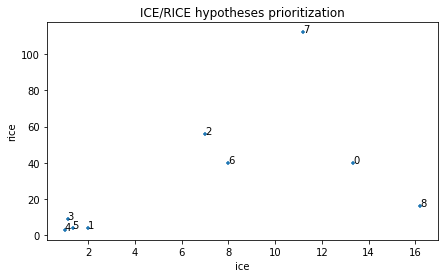

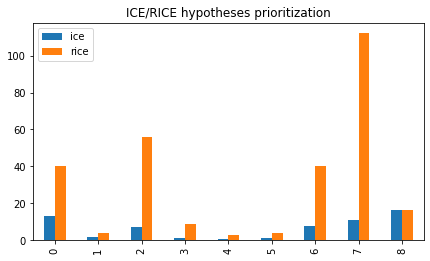

In [20]:
#Plotting scatter and bar plots for visualization
hypo.plot.scatter(x='ice', y='rice',title='ICE/RICE hypotheses prioritization',marker='+',figsize=(7,4))

annotations=hypo.index
for i, label in enumerate(annotations):
    plt.annotate(label, (hypo['ice'].values[i], hypo['rice'].values[i]))

hypo.reset_index().plot(kind='bar',y=['ice','rice'], title='ICE/RICE hypotheses prioritization',figsize=(7,4));

**Components:**
- Reach — how many users will be affected by the update you want to introduce.
- Impact — how strongly this update will affect the users, their experience, and their satisfaction with the product.
- Confidence — how sure you are that your product will affect them in this way.
- Effort — how much will it cost to test the hypothesis.

**ICE five most promising hypotheses:**
- Launch a promotion that gives users discounts on their birthdays.
- Add two new channels for attracting traffic. This will bring 30% more users.
- Add a subscription form to all the main pages. This will help you compile a mailing list.
- Show banners with current offers and sales on the main page. This will boost conversion.
- Add product recommendation blocks to the store's site. This will increase conversion and average purchase size.

**RICE five most promising hypotheses:**
- Add a subscription form to all the main pages. This will help you compile a mailing list
- Add product recommendation blocks to the store's site. This will increase conversion and average purchase size
- Add two new channels for attracting traffic. This will bring 30% more users
- Show banners with current offers and sales on the main page. This will boost conversion
- Launch a promotion that gives users discounts on their birthdays

**Plots and table depict:**
- RICE always has the higher values.
- Based on both scores the most promising hypotheses are 7,2,0,6,8.
- Same hypotheses in the top 5, but different order, due to reach component or RICE.

# Part 2. A/B Test Analysis

## 1. Graph cumulative revenue by group. Make conclusions and conjectures.

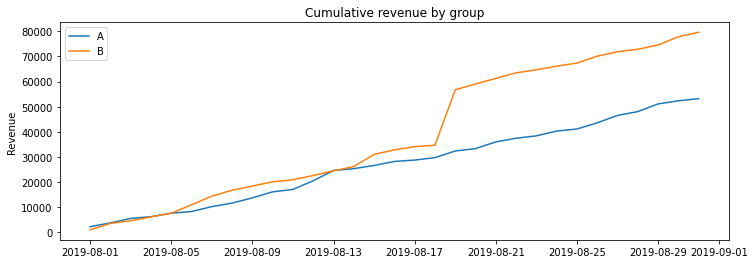

In [21]:
#Creating array of unique paired date group values
datesGroups = orders[['date', 'group']].drop_duplicates()

#Aggregating cumulative daily orders data
ordersAgg = datesGroups.apply(lambda x: 
                                     orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg
                                     ({'date':'max', 'group':'max', 'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'}),
                                    axis=1).sort_values(by=['date', 'group'])

#Aggregating cumulative daily visits data
visitsAgg = datesGroups.apply(lambda x:
                                    visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg
                                    ({'date':'max', 'group':'max', 'visits':'sum'}), axis=1).sort_values(by=['date', 'group'])

#Merging tables and renaming columns
cumData = ordersAgg.merge(visitsAgg, on=['date', 'group'])
cumData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

#Creating group A dataframe of daily cumulative orders and cumulative revenue
cumRevenueA = cumData[cumData['group'] == 'A'][['date', 'revenue', 'orders']].copy()

#Creating group B dataframe of daily cumulative orders and cumulative revenue
cumRevenueB = cumData[cumData['group'] == 'B'][['date', 'revenue', 'orders']].copy()

#Plotting cumulative revenue by group
plt.figure(figsize=(12,4))
plt.title('Cumulative revenue by group')
plt.plot(cumRevenueA['date'], cumRevenueA['revenue'], label='A')
plt.plot(cumRevenueB['date'], cumRevenueB['revenue'], label='B')
plt.ylabel('Revenue')
plt.legend()
plt.show()

Graph depicts the cumulative revenue by group. We see that at first, revenues are very similar. Towards 2019-08-21, revenue of group B increased (~30000), while revenue of group A didn't. This may be due to anomalous and expensive orders affecting the cumulative revenue. Afterwards, the difference remains at ~30000 although both continue to grow steadily. Trends are good and imply profits are made regardless of the group, yet group B is mostly in the lead.

## 2. Graph cumulative average order size by group. Make conclusions and conjectures.

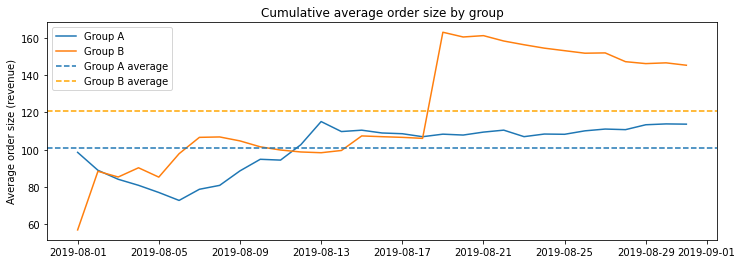

In [22]:
#Plotting cumulative average order size by group
plt.figure(figsize=(12,4))
plt.title('Cumulative average order size by group')
plt.plot(cumRevenueA['date'], cumRevenueA['revenue'] / cumRevenueA['orders'], label='Group A')
plt.plot(cumRevenueB['date'], cumRevenueB['revenue'] / cumRevenueB['orders'], label='Group B')
plt.axhline((cumRevenueA['revenue']/cumRevenueA['orders']).mean(), linestyle='--', label='Group A average')
plt.axhline((cumRevenueB['revenue']/cumRevenueB['orders']).mean(), color='orange', linestyle='--', label='Group B average')
plt.ylabel('Average order size (revenue)')
plt.legend()
plt.show()

Graph depicts cumulative average order size by group. Average order sizes stabilize towards the end, yet we still see the same spike for group B arounds the same time as in our previous graph, possibly due to outliers. After the spike revenue values for group B decrease even though up to that point there was an increase. Group A starts with a decrease but after about a week increases and slowly stabilizes.

## 3. Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

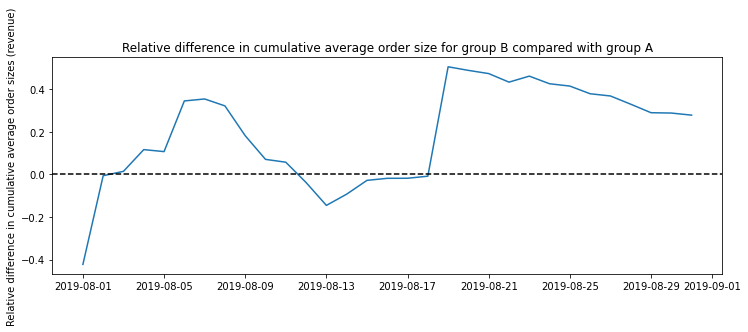

In [23]:
#Merging cumulative revenue dataframes
mergedCumRevenue = cumRevenueA.merge(cumRevenueB, on='date', how='left', suffixes=['A', 'B'])

#Plotting relative difference in cumulative average order sizes
plt.figure(figsize=(12,4))

#Relative difference between x and y is (x-y)/y, and is equivalent to x/y-1
plt.plot(mergedCumRevenue['date'],
         (mergedCumRevenue['revenueB']/mergedCumRevenue['ordersB'])\
         /(mergedCumRevenue['revenueA']/mergedCumRevenue['ordersA'])-1)

#Adding X axis
plt.axhline(y=0, color='black', linestyle='--')

plt.title('Relative difference in cumulative average order size for group B compared with group A')
plt.ylabel('Relative difference in cumulative average order sizes (revenue)')
plt.show()

The difference starts with negative values and increases to positive values, followed by a drop back to the negatives, towards 2019-08-21 the difference increases significantly and then slowly decreases until the end. This increase is at the same time as in our previous graphs, and may be due to outliers instead of difference in test conditions. Group B is once again mostly in the lead.

We recommended continuing the test to see whether the value of relative difference will continue decreasing or remain stable.

## 4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

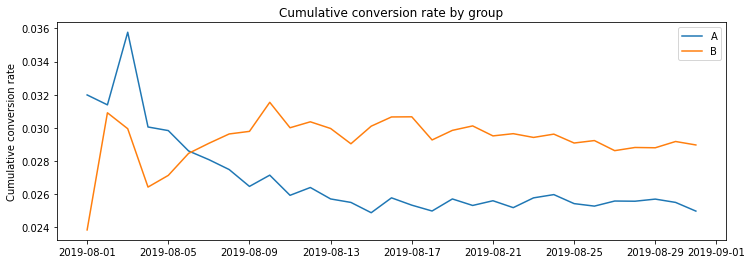

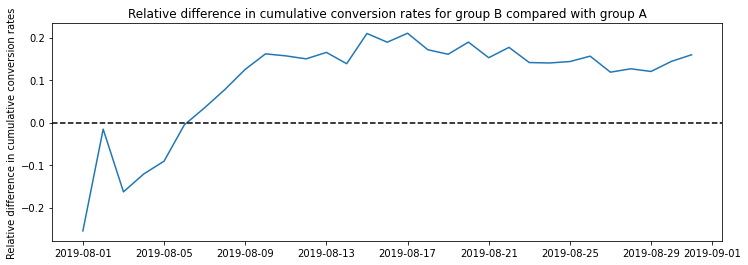

In [24]:
#Calculating cumulative conversion rate by daily ratio of orders to visits
cumData['conversion'] = cumData['orders']/cumData['visits']

#Creating group A dataframe of daily cumulative conversion rate
cumDataA = cumData[cumData['group']=='A']

#Creating group B dataframe of daily cumulative conversion rate
cumDataB = cumData[cumData['group']=='B']

#Plotting cumulative conversion rate by group
plt.figure(figsize=(12,4))
plt.plot(cumDataA['date'], cumDataA['conversion'], label='A')
plt.plot(cumDataB['date'], cumDataB['conversion'], label='B')
plt.title('Cumulative conversion rate by group')
plt.ylabel('Cumulative conversion rate')
plt.legend()
plt.show()

#Merging cumulative conversion rate dataframes and calculating relative difference
mergedCumConversions=cumDataA[['date','conversion']].merge(cumDataB[['date','conversion']]
                                                           ,on='date',how='left', suffixes=['A','B'])

#Plotting relative difference in cumulative conversion rates
plt.figure(figsize=(12,4))
plt.plot(mergedCumConversions['date'], mergedCumConversions['conversionB']/mergedCumConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Relative difference in cumulative conversion rates for group B compared with group A')
plt.ylabel('Relative difference in cumulative conversion rates')
plt.show()

Graph depicts conversion rate as the ratio of daily orders to number of visits per both group. There is an initial fluctuation with group A in the lead, yet after around a week, the ratio of group A decreases while group B increases and then stabilize with group B mostly in the lead. Both seem to fluctuate around the ratio of: A-0.025/0.026, B-0.029/0.031. Difference is always in the range of 0 to +/- 0.2.

## 5. Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

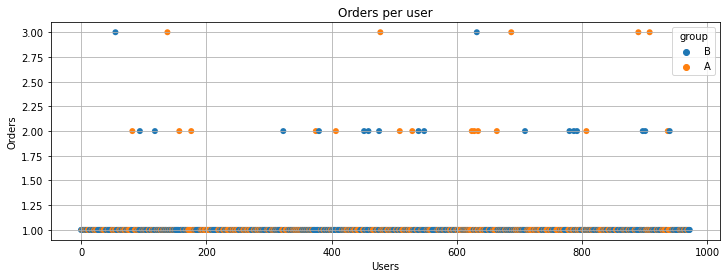

In [25]:
#Creating DataFrame for orders per user
ordersByUsers = orders.groupby(['visitorId', 'group']).agg({'transactionId':'nunique'}).reset_index()
ordersByUsers.columns = ['visitorId','group','orders']

#Plotting scatter chart of number of orders per user
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(12,4))
sns.scatterplot(data=ordersByUsers, x=x_values, y="orders", hue='group',linewidth=0)
plt.xlabel('Users')
plt.ylabel('Orders')
plt.title('Orders per user')
plt.grid();

The scatter plot depicts user orders per group. The majority of users had placed only 1 order and few placed 2 or more with the max of 3. These cases may be outliers.

Calculating the 95th and 99th percentile of orders per user will present a clearer difference.

## 6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [26]:
#Calculating the 95th and 99th percentiles for the number of orders per user
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

95% of the users placed just 1 order, 5% placed over 1 order and only 1% made over two. Values over 1 are anomalies as seen in our above plot as well.

## 7. Plot a scatter chart of order prices. Make conclusions and conjectures.

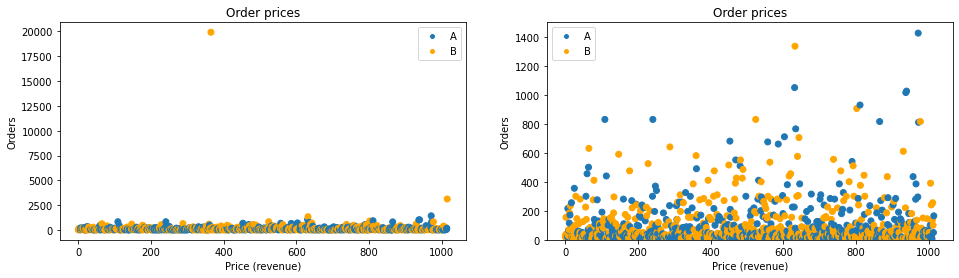

In [27]:
#Plotting scatter chart of order prices
x_values = pd.Series(range(0,len(orders['revenue'])))

fig, ax = plt.subplots()
fig.set_size_inches(16,4)

plt.subplot(1,2,1)
plt.xlabel('Price (revenue)')
plt.ylabel('Orders')
plt.title('Order prices')
plt.scatter(x_values, orders['revenue'], c=orders['group'].map({'A':'tab:blue', 'B':'orange'}))

custom_legend = [Line2D([0],[0], markerfacecolor='tab:blue', marker='o',color='w'),
            Line2D([0],[0], markerfacecolor='orange', marker='o',color='w')]

plt.legend(custom_legend, ['A', 'B']);


#Plotting scatter chart of order prices under 1500 for a closer clearer look
plt.subplot(1,2,2)
plt.ylim(0,1500)
plt.xlabel('Price (revenue)')
plt.ylabel('Orders')
plt.title('Order prices')
plt.scatter(x_values, orders['revenue'], c=orders['group'].map({'A':'tab:blue', 'B':'orange'}))

plt.legend(custom_legend, ['A', 'B']);

The scatter plots depict that most orders are less than 2500, with the majority ranging up to ~500, yet it is difficult to say anything about the revenue of smaller orders. 

Anomalous orders are visible such as ~2500 and the most noticeable value is ~20000, which may have caused the increase in revenue and average order size for group B seen in previous graphs. 

After truncating outliers by limiting y values to max of 1500 dollars, it is clear there are more yet less extreme outliers over ~400 dollars.

Calculating the 95th and 99th percentile of order prices will present a clearer difference.

## 8. Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [28]:
#Calculating the 95th and 99th percentiles of order prices
np.percentile(orders['revenue'], [95, 99])

array([414.275, 830.3  ])

95% of the users placed orders up to the price of 414.275, 5% placed over that and only 1% made orders of over 830.3. Values over 414.275 are anomalies as seen in our above plots as well.

## 9. Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

**Null Hypothesis H0**: there isn't a statistically significant difference in conversion rate between Group A and Group B.

**Alternative Hypothesis H1**: there is a statistically significant difference in conversion rate between Group A and Group B.

The criterion we'll use to test the hypotheses is 5% significance level (alpha) as it is typical in behavioral science.

In [29]:
#Creating dataframe for group A orders per user
ordersByUsersA=(orders[orders['group']=='A'].groupby('visitorId',as_index=False)
                .agg({'transactionId':pd.Series.nunique}))

ordersByUsersA.columns = ['visitorId', 'orders']

#Creating dataframe for group B orders per user
ordersByUsersB=(orders[orders['group']=='B'].groupby('visitorId', as_index=False)
                .agg({'transactionId':pd.Series.nunique}))

ordersByUsersB.columns = ['visitorId', 'orders']

#Creating dataframe of group A users who made orders 
sampleA = pd.concat([ordersByUsersA['orders'], 
                     pd.Series(0, index=np.arange(
                         visits[visits['group']=='A']['visits'].sum() - 
                         len(ordersByUsersA['orders'])), name='orders')], axis=0)

#Creating dataframe of group B users who made orders 
sampleB = pd.concat([ordersByUsersB['orders'], 
                     pd.Series(0, index=np.arange(
                         visits[visits['group']=='B']['visits'].sum() - 
                         len(ordersByUsersB['orders'])), name='orders')], axis=0)

#Testing hypothesis with the Mann-Whitney U test for both samples
alpha = 0.05

results = st.mannwhitneyu(sampleA, sampleB)

print("p-value: {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print("Relative difference: {0:.1%}".format(sampleB.mean()/sampleA.mean()-1))

if (results.pvalue < alpha):
    print("We reject the null hypothesis: there is a statistically significant difference in conversion rate between Group A and Group B")
else:
    print("We can't reject the null hypothesis: there isn't a statistically significant difference in conversion rate between Group A and Group B")

p-value: 0.006
Relative difference: 16.0%
We reject the null hypothesis: there is a statistically significant difference in conversion rate between Group A and Group B


Calculations using raw data result in a p-value of 0.006 (lower than 0.05), therefore the null hypothesis is rejected and the groups' conversion rate are statistically significantly different.

Group B has a 16% higher conversion rate than group A.

Testing the hypothesis with filtered data (without outliers) will determine whether this result is an outcome of anomalies.

## 10. Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

**Null Hypothesis H0**: there isn't statistically significant difference in average order size between Group A and Group B.

**Alternative Hypothesis H1**: there is a statistically significant difference in average order size between Group A and Group B.

The criterion we'll use to test the hypotheses is 5% significance level (alpha) as it is typical in behavioral science.

In [30]:
#Creating sample dataframes for testing per group
orderSizeA = orders[orders['group']=='A']['revenue']
orderSizeB = orders[orders['group']=='B']['revenue']

#Testing hypothesis with the Mann-Whitney U test for both samples
alpha = 0.05

results = st.mannwhitneyu(orderSizeA, orderSizeB)

print('p-value: {0:.3f}'.format(st.mannwhitneyu(orderSizeA, orderSizeB)[1]))
print('Relative difference: {0:.1%}'.format(orderSizeB.mean()/orderSizeA.mean()-1))

if (results.pvalue < alpha):
    print("We reject the null hypothesis: there is a statistically significant difference in average order size between Group A and Group B")
else:
    print("We can't reject the null hypothesis: there isn't statistically significant difference in average order size between Group A and Group B")

p-value: 0.431
Relative difference: 27.8%
We can't reject the null hypothesis: there isn't statistically significant difference in average order size between Group A and Group B


Calculations using raw data result in a p-value of 0.431 (higher than 0.05), therefore the null hypothesis isn't rejected and the groups' average order size aren't statistically significantly different.

Group B has a 27.8% higher average order than group A.

Testing the hypothesis with filtered data (without outliers) will determine whether this result is an outcome of anomalies.

## 11. Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

**Null Hypothesis H0**: there isn't a statistically significant difference in conversion rate between Group A and Group B using filtered data.

**Alternative Hypothesis H1**: there is a statistically significant difference in conversion rate between Group A and Group B using filtered data.

The criterion we'll use to test the hypotheses is 5% significance level (alpha) as it is typical in behavioral science.

In [31]:
#Creating slice using the 99th percentile of orders per user
order_lim = np.percentile(ordersByUsers['orders'], 99)
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] >= order_lim]['visitorId'],
                                 ordersByUsersB[ordersByUsersB['orders'] >= order_lim]['visitorId']], axis = 0)

#Creating slice using the 95th percentile of order price
price_lim = np.percentile(orders['revenue'], 95)
userWithExpensiveOrders = orders[orders['revenue'] > price_lim]['visitorId']

#Joining the slices 
abnormalUsers = pd.concat([usersWithManyOrders, userWithExpensiveOrders], axis=0).drop_duplicates().sort_values()

#Creating sample dataframes of filtered data
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'], 
     pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), 
               name='orders')],axis=0)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'], 
     pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), 
               name='orders')],axis=0)

#Testing hypothesis with the Mann-Whitney U test for both samples
alpha = 0.05

results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print("p-value: {0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Relative difference: {0:.1%}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

if (results.pvalue < alpha):
    print("We reject the null hypothesis: there is a statistically significant difference in conversion rate between Group A and Group B using filtered data")
else:
    print("We can't reject the null hypothesis: there isn't a statistically significant difference in conversion rate between Group A and Group B using filtered data")

p-value: 0.008
Relative difference: 17.4%
We reject the null hypothesis: there is a statistically significant difference in conversion rate between Group A and Group B using filtered data


Data was filtered by the anomalous points determined earlier- number of orders over 1 and order price above 414.275.

Then two variables were created- sampleAFiltered and sampleBFiltered to store the data per group after the anomalies have been filtered out.

Calculations using filtered data result in a p-value of 0.008 (lower than 0.05), therefore the null hypothesis is rejected and the groups' conversion rate are statistically significantly different.

Group B has a 17.4% higher conversion rate than group A.

Filtering outliers didn't influence the statistical test results.

## 12. Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

**Null Hypothesis H0**: there isn't a statistically significant difference in average order size between Group A and Group B using filtered data.

**Alternative Hypothesis H1**: there is a statistically significant difference in average order size between Group A and Group B using filtered data.

The criterion we'll use to test the hypotheses is 5% significance level (alpha) as it is typical in behavioral science.

In [32]:
#Creating dataframes of filtered data
orderSizeAFiltered = (orders[np.logical_and(orders['group']=='A',
                                            np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])

orderSizeBFiltered = (orders[np.logical_and(orders['group']=='B',
                                            np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])

#Testing hypothesis with the Mann-Whitney U test for both samples
alpha = 0.05

results = st.mannwhitneyu(orderSizeAFiltered, orderSizeBFiltered)

print('p-value: {0:.3f}'.format(st.mannwhitneyu(orderSizeAFiltered, orderSizeBFiltered)[1]))
print('Relative difference: {0:.1%}'.format(orderSizeBFiltered.mean()/orderSizeAFiltered.mean()-1))

if (results.pvalue < alpha):
    print("We reject the null hypothesis: there is a statistically significant difference in average order size between Group A and Group B using filtered data")
else:
    print("We can't reject the null hypothesis: there isn't a statistically significant difference in average order size between Group A and Group B using filtered data")

p-value: 0.386
Relative difference: -3.3%
We can't reject the null hypothesis: there isn't a statistically significant difference in average order size between Group A and Group B using filtered data


Two variables were created- orderSizeAFiltered and orderSizeBFiltered to store the data per group after the anomalies have been filtered out.

Calculations using filtered data result in a p-value of 0.386 (higher than 0.05), therefore the null hypothesis isn't rejected and the groups' average order size aren't statistically significantly different.

Group A has a 3.3% higher average order size than group B- before filtering B was in the lead.

Filtering outliers influenced the statistical test by resulting in a larger difference than before.

## 13. Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.

In summary, this project provides actionable insights to the marketing experts on hypotheses that may help boost revenue.

In this project, we followed the methodology as follows:
- Open the date file and study the general information.
- Data preprocessing including verifying there are no missing values and converting data to required types.
- Make calculations as required for the analysis.
- Prioritize the hypotheses.
- Analyze the A/B test.
- Plot graphs and then interpret the results.
- Test hypotheses.
- And now, final conclusion.

Our main findings:
- There is a statistically significant difference in conversion rates per group-  raw data and filtered data as well. Towards the end of the test the difference stabilized.
- Group B's conversion rate is higher than Group A's by: raw-16% , filtered-17.4%.
- Group B could significantly improve our conversion rates.

- There isn't a statistically significant difference in the average order size per group- raw data and filtered data as well.
- Group B in the lead with raw by 27.8% of average order size, yet in filtered 3.3% group A is in the lead.  
- Group B isn't contributing or doesn't have any influence on the improvement of the order sizes.

Options:
**1. Stop the test, consider one of the groups the leader.**
2. Stop the test, conclude that there is no difference between the groups.
3. Continue the test.

Final say:
- The test can be **stopped** as the results were clear and reflected stable tendencies.
- There was no significant difference between average order size per group, yet it was shown that there is a statistically significant difference in conversion rate between the two groups with **Group B** in the lead.
- The hypothesis tested will improve the conversion rate, yet not the average purchase size.